# 07 - Probability

## What is Probability?
Probability is a way of quantifying uncertainty. It describes the likelihood of a specific event happening within a set of possible events, ranging from 0 (impossible) to 1 (certain). Probability plays a critical role in statistics, machine learning, and decision-making processes.

We will cover:
1. **Basic concepts of probability** 
    - e.g. Experiment, Sample Space, Event

2. **Types of probability** 
    - e.g. Classical, Empirical, Subjective, Conditional, Joint

3. **Operations between events**
    - e.g. Union, Intersection, Complement, Difference

4. **Bayes' Theorem and its applications**

5. **Example Problems with Simulations in Python**

## Basic Concepts of Probability
Let's begin with some basic terminology:

- **Experiment**: Any action that results in a well-defined outcome. 
    - **Example**: Rolling a die

- **Sample Space (S)**: The set of all possible outcomes. 
    - **Example**:  For a die, the sample space is $S = \{1, 2, 3, 4, 5, 6\}$.

- **Event (E)**: A subset of the sample space, such as getting an even number $ E = \{2, 4, 6\}$.

### Probability of an Event
The **probability** of an event $E$ happening, denoted as $P(E)$, is defined as the ratio of favorable outcomes for the event $E$ to the total number of possible outcomes in the sample space $S$.

$$P(E) = \frac{\text{Number of favorable outcomes for E}}{\text{Total number of possible outcomes in S}}$$

### Example
Let's calculate the probability of getting an even number when rolling a fair die.

- **Sample space $S = \{1, 2, 3, 4, 5, 6\}$**, so there are 6 possible outcomes.

- The **event** $E$ of rolling an even number is $E = \{2, 4, 6\}$, so there are 3 favorable outcomes

Using the formula for probability:

$$P(E) = P( \{2, 4, 6\}) = \frac{3}{6} = 0.5$$

Thus, the probability of rolling an even number is $P(E) = 0.5 = 50\%$.

#### Connecting Theory to Practice
In real-world scenarios, we often perform experiments to estimate probabilities when theoretical calculations are complex or when we want to validate the theoretical results.

We'll demonstrate this by simulating an experiment of rolling a die multiple times and estimating the probability of getting an even number. 

This allows us to compare our simulated results with the theoretical probability we just calculated.

1. **Rolling the Die**:

    - We'll walk through simulating the roll of a die 1000 times and calculate the probability of rolling an even number.

    - We define a function `roll_die()` that simulates rolling a 6-sided die using Python's `random.randint()` function.

In [23]:
import random

# Simulate rolling a die
def roll_die():
    return random.randint(1, 6)


This function returns a random number between 1 and 6.

In [24]:
# Example usage
roll_die()

5

2. **Simulating 1000 Rolls**:

    - We simulate rolling the die 1000 times and keep track of how many times we roll an even number (2, 4, or 6).

In [25]:
# Number of simulations
n_simulations = 1000
even_count = 0
all_rolls = []

# Simulate rolling a die 1000 times
for i in range(n_simulations):
    # Roll the die
    roll = roll_die()
    # print(f"Simulation #{i+1}, Number Rolled: {roll}")

    # Add roll to list `all_rolls`
    all_rolls.append(roll)

    # Increment `even_count` if the roll is even
    if roll % 2 == 0:
        even_count += 1

3. **Calculating Probability**:

    - After the simulation, we estimate the probability of rolling an even number by dividing the number of even rolls by the total number of simulations (1000 in this case).

In [26]:
print(f"Total simulation: {n_simulations}")
print(f"Count of even rolls: {even_count}")

# Probability of getting an even number
prob_even = even_count / n_simulations
print(f"Estimated Probability of getting an even number = {even_count}/{n_simulations} =  {prob_even:.4f} = {prob_even*100:.2f}%")

Total simulation: 1000
Count of even rolls: 520
Estimated Probability of getting an even number = 520/1000 =  0.5200 = 52.00%


4. **Visualization**:

    - We can create a bar chart showing the distribution of even and odd rolls from the simulation, helping us visually interpret the frequency of each outcome.

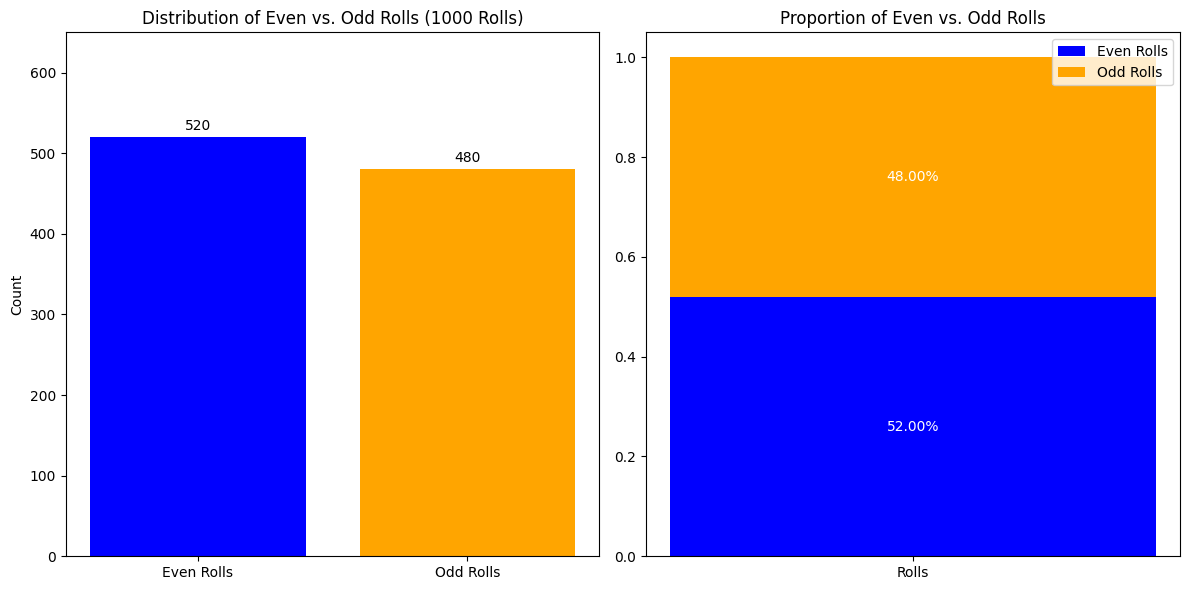

In [27]:
import matplotlib.pyplot as plt

# Visualization: Distribution of rolls (odd vs. even)

# Data for the plots
odd_count = n_simulations - even_count
prob_odd = 1 - prob_even
labels = ['Even Rolls', 'Odd Rolls']
counts = [even_count, odd_count]

# Set up subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Simple bar chart with counts
axes[0].set_ylim(0, 650)
axes[0].bar(labels, counts, color=['blue', 'orange'])
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Even vs. Odd Rolls (1000 Rolls)')

# Add count annotations on top of the bars
for i, count in enumerate(counts):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom')

# Second subplot: Stacked bar chart showing proportions
# For stacking, we need to use two bars with a sum of 1
axes[1].bar('Rolls', prob_even, color='blue', label='Even Rolls')
axes[1].bar('Rolls', prob_odd, bottom=prob_even, color='orange', label='Odd Rolls')

# Add proportion annotations inside the stacked bars
axes[1].text(0, prob_even / 2, f'{prob_even:.2%}', ha='center', va='center', color='white')
axes[1].text(0, prob_even + prob_odd / 2, f'{prob_odd:.2%}', ha='center', va='center', color='white')

axes[1].set_title('Proportion of Even vs. Odd Rolls')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Types of Probability

### Classical Probability
This type of probability applies when all possible outcomes are equally likely. For example, the probability of flipping heads in a fair coin toss is 0.5.

### Empirical (Frequentist) Probability
This probability is based on the frequency of an event after multiple trials. For example, if we roll a die 1000 times and get an even number 510 times, the empirical probability of getting an even number is 510/1000 = 0.51.

### Subjective Probability
This probability is based on personal judgment or experience, rather than empirical evidence. For example, a weather forecast might predict a 70% chance of rain based on experience.